## Research Question:

** An XYZ company is a real-estate company. Its main business activities include buying new houses, upgrade them and re-sell them at higher value in the future. They also buy houses, upgrade them and rent them for earning incomes. It has heard the importance of data-driven and statistics-driven approach in decision making and asked me for help in its decision making. It wanted me to help them answer the following questions: **
<br>
- Is this the good time in investing in real-estate? If it's a good time, when is the best time to buy houses? <br>
- Which neighborhood should we invest our money in? Will our investment be rising in value in the future? <br>
- Which neighborhood is the easiest to attract rent? <br>

** Assumptions**: Today is 1 January 2011

In [1]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

In [2]:
houses = pd.read_table('AmesHousing_1.txt')
df_gdp_market = pd.read_excel('total_gdp_market_prices.xlsx',index_col=0)

In [3]:
def prepare_gdp_plot():
    #y_labelss = round(df_gdp_market.iloc[0] / 1000000000000,2)
    y_labelss = ['11.0','11.16','11.32','11.48','11.64','11.80']
    incr = (11800000000000 - 11000000000000) / 5
    base=  11000000000000
    y_labels = [base,base+incr,base+incr*2,base+incr*3,base+incr*4,base+incr*5]
    x_labels = [2006,2007,2008,2009,2010]
    
    return (x_labels,y_labels,y_labelss)

def prepare_gdp_plot_2():
    #y_labelss = round(df_gdp_market.iloc[0] / 1000000000000,2)
    y_labelss = ['0','2.36','4.72','7.08','9.44','11.80']
    incr = (11800000000000 - 0) / 5
    base=  0
    y_labels = [base,base+incr,base+incr*2,base+incr*3,base+incr*4,base+incr*5]
    x_labels = [2006,2007,2008,2009,2010]
    
    return (x_labels,y_labels,y_labelss)

In [4]:
def wrangle_housing_data():
    # groupby Neighborhood and obtain its size. This size corresponds to number of houses sold in each neighborhood.
    houses_by_size_series = houses.groupby('Neighborhood').size().sort_values(ascending=False)
    
    # obtain mean SalePrice in each Neighborhood
    houses_by_saleprice_series = houses.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
    # I just want Neighborhoods with a mean Saleprice of above 180,000
    houses_by_saleprice_series = houses_by_saleprice_series[houses_by_saleprice_series > 180000]
    # convert index into a list  --> and store it into house_price_list
    house_price_list = houses_by_saleprice_series.index.tolist()
    
    # === debugging
    #print(houses_by_saleprice_series)
    #print('----------')
    
    # I just want the top 10 Neighbors in term of Average SalePrice. This will be stored
    # into a dict data structure, which I called neighborhood_price_dict
    # Also I want the houses_by_size_series to follow houses_by_size_series
    neighborhood_price_dict = {}
    for indx,s_ize in zip(houses_by_size_series.index,houses_by_size_series):
        #print(indx,s_ize)
        if len(neighborhood_price_dict) <10:
            #print(indx)
            if indx in house_price_list:
                neighborhood_price_dict[indx] = houses_by_saleprice_series[indx]
            else:
                houses_by_size_series = houses_by_size_series.drop(indx)
        else:
            houses_by_size_series = houses_by_size_series.drop(indx)
            
    # === debugging
    #print(neighborhood_price_dict)
            
    # Replace old series with new data given by a dict    
    houses_by_saleprice_series = pd.Series(neighborhood_price_dict)
    houses_by_saleprice_series = houses_by_saleprice_series.sort_values(ascending=False)
    
    houses_by_size_dict = {}
    for indx in houses_by_saleprice_series.index:
        #print(indx)
        houses_by_size_dict[indx] = houses_by_size_series[indx]
    
    # Convert into series
    houses_by_size_series = pd.Series(houses_by_size_dict)
    
    return (houses_by_saleprice_series,houses_by_size_series)
    

In [5]:
def get_z_score_for_each_neighborhoods_given_a_price(price,df):
    houses = df
    def calc_z_score(value, array, bessel = 0):
        #mean = sum(array) / len(array)
        mean = np.mean(array)
        st_dev = np.std(array, ddof = bessel)
        distance = value - mean
    
        z = distance / st_dev
        return z
    
    df_dict = {}
    for col in houses_by_price_series.index:
        #print(col)
        df = col + '_df'
        #print(df)
        df  = houses[houses['Neighborhood']==col]
        df_dict[col] = df
        
    z_score_dict = {}
    abs_z_score_dict = {}
    for key,data in df_dict.items():
        #print(key)
        #z_score(220000,data)
        z_score_dict[key] = calc_z_score(price,data['SalePrice'])
        abs_z_score_dict[key] = np.abs(calc_z_score(price,data['SalePrice']))
    
    return (z_score_dict,abs_z_score_dict)

In [6]:
def prepare_saleprice_kde_plot():
    house_mean = round(np.mean(houses['SalePrice']))
    house_std = round(np.std(houses['SalePrice']))
    house_std_plus_mean = house_mean + house_std
    price_min = houses['SalePrice'].min()
    price_max = houses['SalePrice'].max()
    
    return (house_mean,house_std_plus_mean,price_min,price_max)


def prepare_second_plot():
    label_list = []
    data_list = []
    for key,val in z_score_dict.items():
        #print(col)
        label_list.append(key)
        data_list.append(val)
        
    colors_list = []
    for val in label_list:
        #print(val)
        if z_score_dict[val] < 0:
            colors_list.append('yellow')
        elif z_score_dict[val] > 0:
            colors_list.append('blue')
        
    return (label_list,data_list,colors_list)

def prepare_for_third_plot():
    base1=  11000000000000
    incr1 = (11800000000000 - 11000000000000) / 5
    y_labels1 = [base1,base1+incr1,base1+incr1*2,base1+incr1*3,base1+incr1*4,base1+incr1*5]
    y_labelss1 = ['11.0','11.16','11.32','11.48','11.64','11.80']
    x_labels = [2006,2007,2008,2009,2010,2011]
    
    base2 = 0
    incr2 = (130000000) / 5
    y_labels2 = [base2,base2+incr2,base2+incr2*2,base2+incr2*3,base2+incr2*4,base2+incr2*5]
    y_labelss2 = ['0','26','52','78','104','130']
    
    return (x_labels,y_labels1,y_labelss1,y_labels2,y_labelss2)

## 1. Exploratory Data Analysis

### 1.b US GDP Data

In [7]:
df_gdp_market = df_gdp_market.reset_index()
df_gdp_market = df_gdp_market[df_gdp_market[df_gdp_market.columns[0]]=='United States']
# because ames housing data is from 2006 up, I also want 2006 and up for gdp data
columns_to_keep = [2006,2007,2008,2009,2010]
df_gdp_market = df_gdp_market[columns_to_keep]

In [8]:
# Note GDP is in trillions
df_gdp_market

,2006,2007,2008,2009,2010
240,1.144269e+13,1.166093e+13,1.161905e+13,1.120919e+13,1.154791e+13


#### GDP plot #1

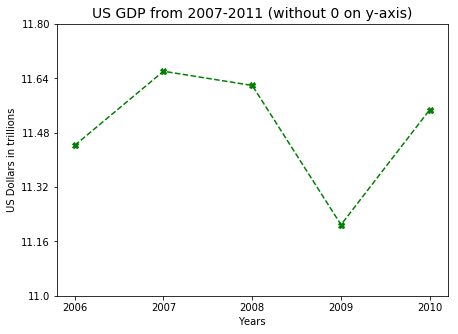

In [9]:
fig,ax = plt.subplots(figsize=(7,5))
x_labels,y_labels,y_labelss = prepare_gdp_plot()
ax.plot(df_gdp_market.iloc[0].index,df_gdp_market.iloc[0],'--X',c='g')
ax.set_xticks(x_labels)
ax.set_yticks(y_labels)
ax.set_yticklabels(y_labelss)
ax.set_ylabel('US Dollars in trillions')
ax.set_xlabel('Years')
ax.set_title('US GDP from 2007-2011 (without 0 on y-axis)',fontsize=14)
plt.show()

#### GDP plot #2: with base 0 on y-axis 

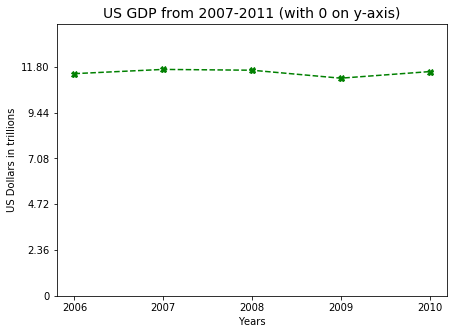

In [10]:
fig,ax = plt.subplots(figsize=(7,5))
x_labels,y_labels,y_labelss = prepare_gdp_plot_2()
ax.plot(df_gdp_market.iloc[0].index,df_gdp_market.iloc[0],'--X',c='g')
ax.set_xticks(x_labels)
ax.set_yticks(y_labels)
ax.set_yticklabels(y_labelss)
ax.set_ylabel('US Dollars in trillions')
ax.set_xlabel('Years')
ax.set_ylim(0, 14000000000000)
ax.set_title('US GDP from 2007-2011 (with 0 on y-axis)',fontsize=14)
plt.show()

<a id='comment_1'></a>
### Comment #1

Note that the `GDP plot #1` may seem that the encoder (data analyst) is trying to mislead the decoder (user of data) by not showing the 0 (zero) on y-axis. By showing the 0 on y-axis, the line graph will look like the `GDP plot #2`. Everyone knows about <a href='https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008'>the Financial Crisis of 2007-2008.</a> (if you are not living under a rock :-))
<br><br>
However, the Financial Crisis of 2007-2008 is **not** shown by looking at `GDP plot #2`. 
<br><br>
Therefore, if I don't include 0 (zero) on y-axis on my plots in this project, the intention is not to mislead users (decoders) but to highlight certain feature. In this case, there is a dip in U.S economic activity especially in 2009. Economic activity started to pick up in 2010 (at least according to the `GDP plot #1`).

### 1.c Housing Data

In [11]:
houses['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [12]:
houses['Neighborhood'].nunique()

28

In [13]:
houses['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

### Comment 2
- There are 28 unique neighbors in the dataframe. This can be very cumbersome to plot. In the `wrangle_ housing_data` function, I only choose 10 Neighbors based on `SalePrice`. 
<br>
- And as a portfolio investor, it is safe to assume that one is interested to know which neighborhoods have the highest House SalePrice.

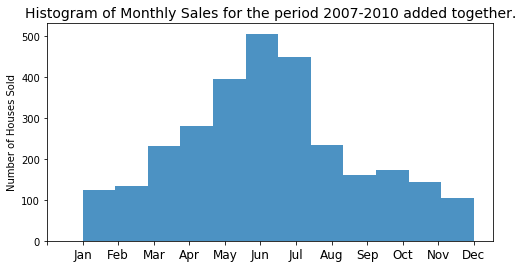

In [14]:
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(houses['Mo Sold'],bins=12,alpha=0.8)
a = [i for i in range(13)]
mths = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(a)
ax.set_xticklabels(mths,fontsize=12)
ax.set_ylabel('Number of Houses Sold')
ax.set_title('Histogram of Monthly Sales for the period 2007-2010 added together.',fontsize=14)
plt.show()

### Comment 3
- **May,June,and July** are the best months to sell houses. 
<br><br>
- Note: This histogram is reproduced again on the <a href='#third_major_plot'>third major plot.</a>


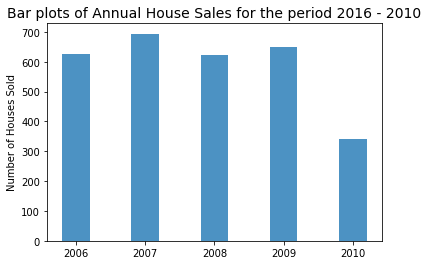

In [15]:
fig,ax = plt.subplots(figsize=(6,4))

ax.bar(houses['Yr Sold'].value_counts().index,houses['Yr Sold'].value_counts(),width=0.4,alpha=0.8)
ax.set_title('Bar plots of Annual House Sales for the period 2016 - 2010',fontsize=14)
ax.set_ylabel('Number of Houses Sold')
plt.show()

### Comment 4
- It seems that financial crisis of 2007-08 began to take effect in 2010 by decreased house sales. Can it be said that house is an **inelastic** goods? People tend to plan long-term in buying houses. People still buy them regardless of economic crisis. 

#### SalePrice kde plot

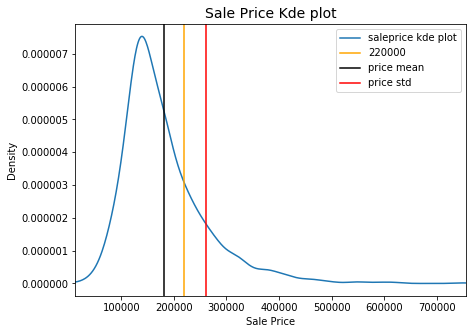

In [16]:
v_al = 220000 # you can change value here 

fig,ax = plt.subplots(figsize=(7,5))
house_mean,house_std_plus_mean,price_min,price_max = prepare_saleprice_kde_plot()
houses['SalePrice'].plot.kde(xlim=(price_min,price_max),label='saleprice kde plot')

ax.axvline(v_al,c='orange',label=str(v_al))
ax.axvline(house_mean,c='k',label='price mean')
ax.axvline(house_std_plus_mean,c='r',label='price std')

ax.set_title('Sale Price Kde plot',fontsize=14)
ax.set_xlabel('Sale Price')
ax.legend()

plt.show()

In [17]:
# this is house std, and house mean
house_std = house_std_plus_mean - house_mean
house_std,house_mean

(79873, 180796)

<a id='comment_5'></a>
### Comment 5
- Why I chose v_al to be 220,000? Because it is around mid-point between the house's mean and STD. IOW (in other words), it is half STDs away from the mean. This v_al is slightly more expensive than average house value. I reckon that choosing a buying value slightly above or below average house price is the most optimal. Too expensive (between 1st STDs and 2nd STDS or above 2nd STDS) and you might be difficult to find a buyer in the future. Sure, the house might be in a good neighborhood with good schools and public service but it is too expensive. Buying a house too cheap (between 1st and 2nd STDS below mean or below 2nd STDs) will also be difficult. Potential upside for house values is lower and a house in a 'poor' neighborhood is not desireable. This is my intuitive interpretation, you might have a different opinion.
<br><br>
- Also people can afford to rent a house or room close to the mean value. 
<br><br>
- v_al = ( 0.5 x STD ) + mean <br>
( 0.5 x 79,873 ) + 180,796 equals around 220,000. 
<br><br>

- Please change this value to whatever you like to experiment. 

## 2. Data Visualization

In [18]:
houses_by_price_series,houses_by_size_series = wrangle_housing_data()

In [19]:
houses_by_price_series

NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
Timber     246599.541667
Somerst    229707.324176
Crawfor    207550.834951
CollgCr    201803.434457
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
dtype: float64

In [20]:
houses_by_size_series

NoRidge     71
StoneBr     51
NridgHt    166
Timber      72
Somerst    182
Crawfor    103
CollgCr    267
Gilbert    165
NWAmes     131
SawyerW    125
dtype: int64

#### Note:
- The order of index for both houses_by_price_series and houses_by_size_series are identical. Now it's time to plot these two data on the same plot as shown below:

<a id='first_major_plot'></a>
#### First Major Plot

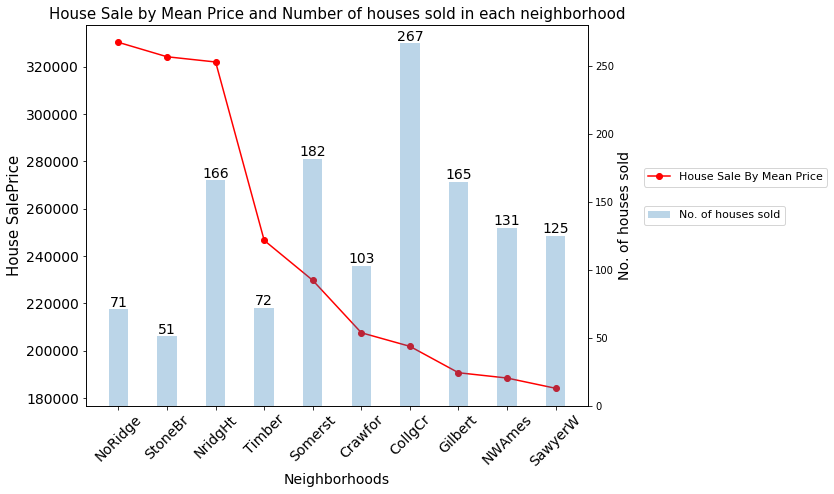

In [21]:
fig,ax1 = plt.subplots(figsize=(9,7))

ax1.plot(houses_by_price_series.index,houses_by_price_series,'-o',c='r',label='House Sale By Mean Price')
plt.yticks(fontsize=14)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

ax2 = ax1.twinx()
ax2.bar(houses_by_size_series.index,houses_by_size_series,alpha=0.3,label='No. of houses sold',width=0.4)
legend_x = 1.1
legend_y = 0.5
ax2.legend(loc='center left',bbox_to_anchor=(legend_x,legend_y),fontsize=11)
ax1.legend(loc='center left',bbox_to_anchor=(legend_x,legend_y+0.1),fontsize=11)
ax1.set_xticklabels(houses_by_price_series.index,rotation=45,fontsize=14)
ax1.set_ylabel('House SalePrice',fontsize=15)
ax2.set_ylabel('No. of houses sold',fontsize=14)
ax1.set_xlabel('Neighborhoods',fontsize=14)

ax1.set_title('House Sale by Mean Price and Number of houses sold in each neighborhood',fontsize=15)

for indx,val in zip(houses_by_size_series.index,houses_by_size_series):
    plt.text(x=indx,y=val+2,s=str(val),horizontalalignment='center',fontsize=14)

#plt.savefig('first_major_plot.png')
plt.show()

<a id='comment_6'></a>
### Comment 6
- Cursory look at the plot above, the best neighborhoods to invest in houses are: NoRidge, StoneBr and NridgHt. Probably also CollgCr because it has high number of house sales. 
<br><br>
- Notice that there is no 0 on the left y-axis (House SalePrice). This is not meant to mislead users. It is meant to highlight Average House SalePrice. Please also read <a href='#comment_1'>comment1 above.</a>

<a id='second_major_plot'></a>
#### Second Major Plot

In [22]:
#v_al = 220000 # you can change value here 
z_score_dict,abs_z_score_dict = get_z_score_for_each_neighborhoods_given_a_price(v_al,houses)

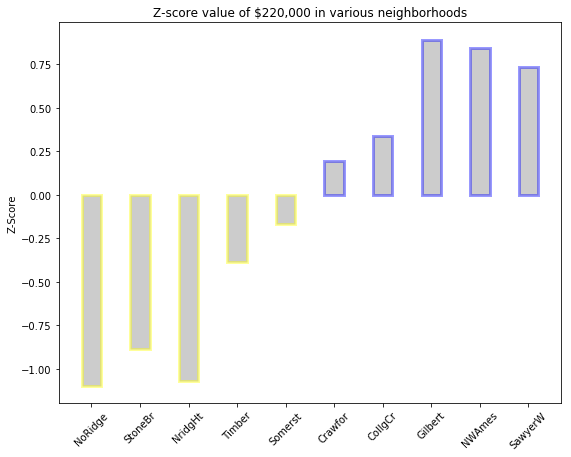

In [23]:
fig,ax = plt.subplots(figsize=(9,7))
label_list,data_list,colors_list = prepare_second_plot()
ax.bar(label_list,data_list,width=0.4,alpha=0.4,edgecolor=colors_list,linewidth=3,color='grey')
ax.set_ylabel('Z-Score')
plt.title('Z-score value of $220,000 in various neighborhoods')
plt.xticks(label_list,rotation=45)
plt.show()

<a id='comment_7'></a>
### Comment 7
- Comment 6 made above is based on cursory look and therefore not statistically based. According to the second major plot and Comment 5 above, it will be better to invest houses in Timber,Somerst, Crawfor, and CollgCr because their z-scores are near the houses' mean value. 
<br><br>
- The SalePrice kde, first and second major plot answer the second and thrid research questions. It's better to buy or rent out houses in these neighborhoods: Timber, Somerst, Crawfor, and CollgCr. Buying houses in  these neighborhoods have the potential upside in house value and it is easier to sell them in the future because prices are near the mean. Renting these houses out are also easier because prices are closer to mean.
<br><br>
- The yellow-edged bar is a z-score below the mean and the blue-edged bar is a z-score above the mean.

<a id='third_major_plot'></a>
#### Third Major Plot

In [24]:
houses_total_price = houses.groupby('Yr Sold')['SalePrice'].agg(['size','sum'])['sum']
#houses_total_price

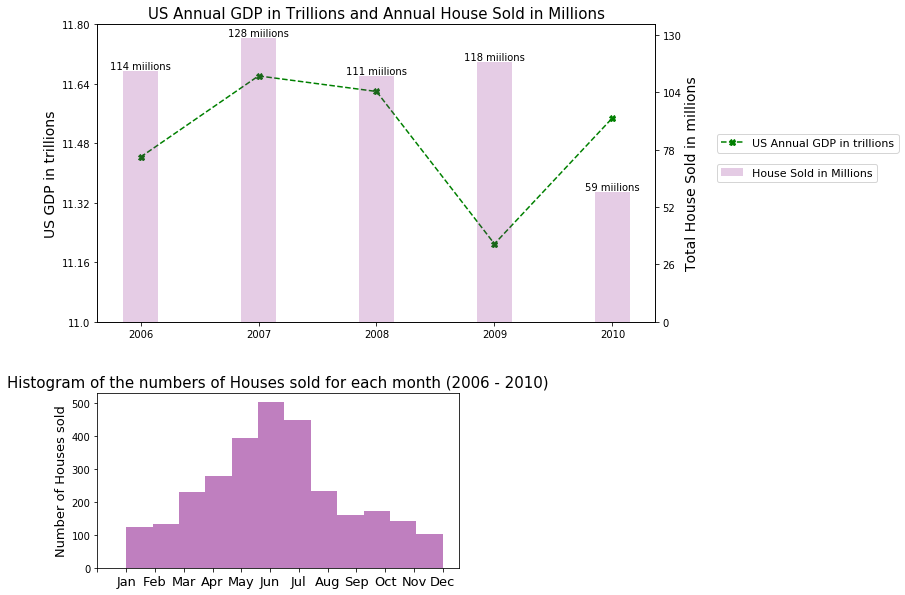

In [25]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(9,3)
x_labels,y_labels1,y_labelss1,y_labels2,y_labelss2 = prepare_for_third_plot()

top = plt.subplot(gs[0:5,:])
top.plot(df_gdp_market.iloc[0].index,df_gdp_market.iloc[0],'--X',c='g',label='US Annual GDP in trillions')
top.set_xticks(x_labels)
top.set_yticks(y_labels1)
top.set_yticklabels(y_labelss1)
top.set_ylabel('US GDP in trillions',fontsize=14)

ax2 = top.twinx()
ax2.bar(houses_total_price.index,houses_total_price,color='purple',alpha=0.2,width=0.3,label='House Sold in Millions')
ax2.set_yticks(y_labels2)
ax2.set_yticklabels(y_labelss2)
ax2.set_ylabel('Total House Sold in millions',fontsize=14)
legend_x = 1.1
legend_y = 0.5
ax2.legend(loc='center left',bbox_to_anchor=(legend_x,legend_y),fontsize=11)
top.legend(loc='center left',bbox_to_anchor=(legend_x,legend_y+0.1),fontsize=11)

for indx,val in zip(houses_total_price.index,houses_total_price):
    #print(indx,val)
    plt.text(x=indx,y=val+1000000,s=str(round(val/1000000))+' miilions',horizontalalignment='center',fontsize=10)
top.set_title('US Annual GDP in Trillions and Annual House Sold in Millions',fontsize=15)    

btm = plt.subplot(gs[6:,:2])
btm.hist(houses['Mo Sold'],bins=12,alpha=0.5,color='purple')
a = [i for i in range(13)]
mths = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
btm.set_title('Histogram of the numbers of Houses sold for each month (2006 - 2010)',fontsize=15)
btm.set_ylabel('Number of Houses sold',fontsize=13)
btm.set_xticks(a)
btm.set_xticklabels(mths,fontsize=13)

plt.show()

### Comment 8
- **Assumption:** We are now in January 2011.
<br><br>
- By looking at the 3rd major plot above, economic activity is starting to pick up and we should tentatively invest in houses. The green GDP line plot shows that GDP started to pick up in 2010.
<br><br>
- We should be more aggressive in seeking houses to buy for the period May through July because those are the times when houses sales peak. We could see this from the histogram on the second subplot on the bottom left.

### These notes are for submission

Ames, Iowa, USA. Real-Estate and economics.




An XYZ company is a real-estate company. Its main business activities include buying new houses, upgrade them and re-sell them at higher value in the future. They also buy houses, upgrade them and rent them for earning incomes. It has heard the importance of data-driven and statistics-driven approach in decision making and asked me for help in its decision making. It wanted me to help them answer the following questions:

- Is this the good time in investing in real-estate? If it's a good time, when is the best time to buy houses? 
- Which neighborhood should we invest our money in? Will our investment be rising in value in the future? 
- Which neighborhood is the easiest to attract rent? 



https://www.gapminder.org/data/  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

By looking at the uploaded plot, it answers the first research question.  Economic activity is starting to pick up and we should tentatively invest in houses. The green GDP line plot shows economic activity started to pick up in 2010.<br><br>
We should be more aggressive in seeking houses to buy for the period May through July because those are the times when houses sales peak. We could see this from the histogram on the second subplot on the bottom left.

Please run my code and you will see that my first and second major plots answer the second and third research questions.

- Truthfulness

Notice that the y-axis on the left (US GDP in trillions) is truncated while the y-axis on the right (Total Houses Sold) is not truncated. This is not to mislead the user. I'm trying to show the effect of Financial Crisis 2007-2008 on the plot. This financial crisis starts to affect the GDP in 2009. We said this 'phenomenon' to be lagging. If I don't 'zoom in' this plot, users will not be able to see this GDP dip. (I explain this in more detail in my code under Comment 1)
<br><br>

We can also see from the plot that economic activity started to pick up in 2010. Since the effect of economic activity tend to be lagging, it is hoped that this rise in economic activity will translate into a rise in house sales in 2011. Again, if I don't zoom-in the plot, you will not be able to see this.
<br><br>

Therefore, I tried to be truthful in applying my data-science skills in presenting data to users (although absolute truth is an ideal, lofty goal)
<br><br>

- Beauty

I use different color schemes to differentiate between GDP activity (green dotted line) and total houses sold (purple with alpha 0.5). Fonts are bigger for the title and labels.
<br><br>

- Functionality 

To answer the first of my research question, I have to somehow put all data in a single figure (with two subplots) without running the risk of cluttering the plot. I made use of matplotlib.gridspec and ax.twinx() to achieve this. I leave a space between the first and second subplot to minimize cluttering. Also the GDP and housing data share the same x-axis with the help of twinx(). 
<br><br>

- Insightfulness

My intention to put many information on a single figure is to create insightfulness. I'm trying to convey that it's time to tentatively buy houses in 2011. (Assumption: We are in January 2011). And the best period to seek houses to buy is from May to July because those are the times when house sales peak. 
<br><br>
If you run my code, you will also see insights from SalePrice kde plot, first and second major plot. These plots will help answer the second and third research questions.
